<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis**


In this lab, I will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, I will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [3]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [4]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [5]:
# Step 1: Check missing values in the critical columns
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

# Step 2: Decide how to handle them
# Example strategy:
# - If the column is essential (like Employment), drop rows where it's missing
# - If the column is subjective but important (like JobSat), fill with the mode (most frequent value)
# - If it's categorical (like RemoteWork), fill with mode too

# Drop rows with missing Employment
df = df.dropna(subset=['Employment'])

# Fill JobSat and RemoteWork with their most frequent values (mode)
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])
df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0])

# Step 3: Verify
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())


Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


count    48704.000000
mean        10.739652
std          8.935175
min          1.000000
25%          4.000000
50%          8.000000
75%         15.000000
max         50.000000
Name: YearsCodePro, dtype: float64
[ 8.  5. 10.  9.  4.  7.  6.  3.  2.  1.  0.]
JobSat
8.0     28298
7.0      6070
6.0      3540
9.0      3457
10.0     2133
5.0      1812
3.0      1106
4.0      1060
2.0       708
0.0       276
1.0       244
Name: count, dtype: int64
count    48704.000000
mean         7.408734
std          1.641419
min          0.000000
25%          7.000000
50%          8.000000
75%          8.000000
max         10.000000
Name: JobSat, dtype: float64
Median Job Satisfaction: 8.0
ExperienceRange
0-5      8.0
5-10     8.0
10-20    8.0
20+      8.0
Name: JobSat, dtype: float64


/var/folders/9p/y0kbtlsn5pz3whpg7t596tj00000gn/T/ipykernel_51235/3344537654.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median()


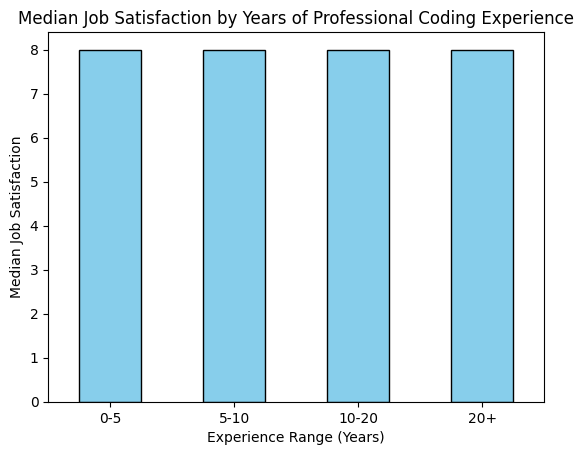

In [6]:
# Convert YearsCodePro to numeric (coerce invalid values to NaN)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
print(df['YearsCodePro'].describe())
#print(df['YearsCodePro'].value_counts().sort_index())

# Drop rows where JobSat or YearsCodePro is missing
df = df.dropna(subset=['YearsCodePro', 'JobSat'])

# Define bins and labels
bins = [0, 5, 10, 20, df['YearsCodePro'].max()]
labels = ['0-5', '5-10', '10-20', '20+']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Check unique values on JobSat
print(df['JobSat'].unique())
# Count frequency of each response
print(df['JobSat'].value_counts())
# Summary of numeric JobSat
print(df['JobSat'].describe())
# Median
print("Median Job Satisfaction:", df['JobSat'].median())


# Calculate median satisfaction for each range
median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median()
print(median_satisfaction)


median_satisfaction.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=0)
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/var/folders/9p/y0kbtlsn5pz3whpg7t596tj00000gn/T/ipykernel_51235/3582455820.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', order=df['JobSat'].value_counts().index, palette='viridis')


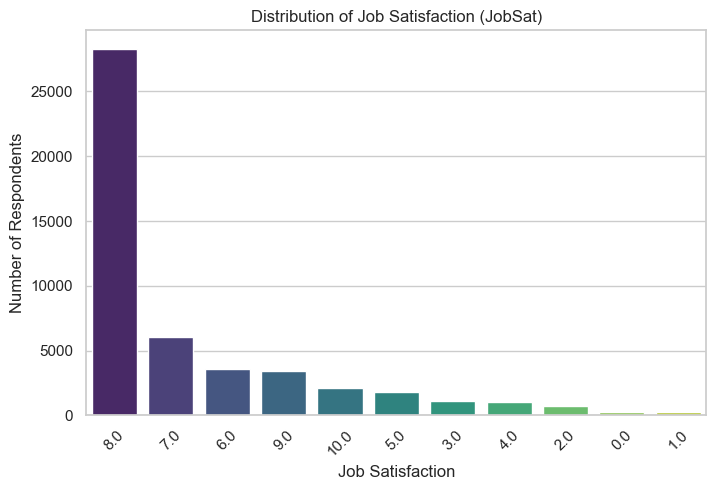

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Count plot for JobSat
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='JobSat', order=df['JobSat'].value_counts().index, palette='viridis')

plt.title('Distribution of Job Satisfaction (JobSat)')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


RemoteWork
Hybrid (some remote, some in-person)    22261
Remote                                  18231
In-person                                8212
Name: count, dtype: int64
EmploymentCategory
Full-time              37447
Self-employed           4356
Full-time + Student     3334
Looking for Work        1336
Part-time               1283
Part-time + Student      705
Multiple/Other           148
Retired                   95
Name: count, dtype: int64


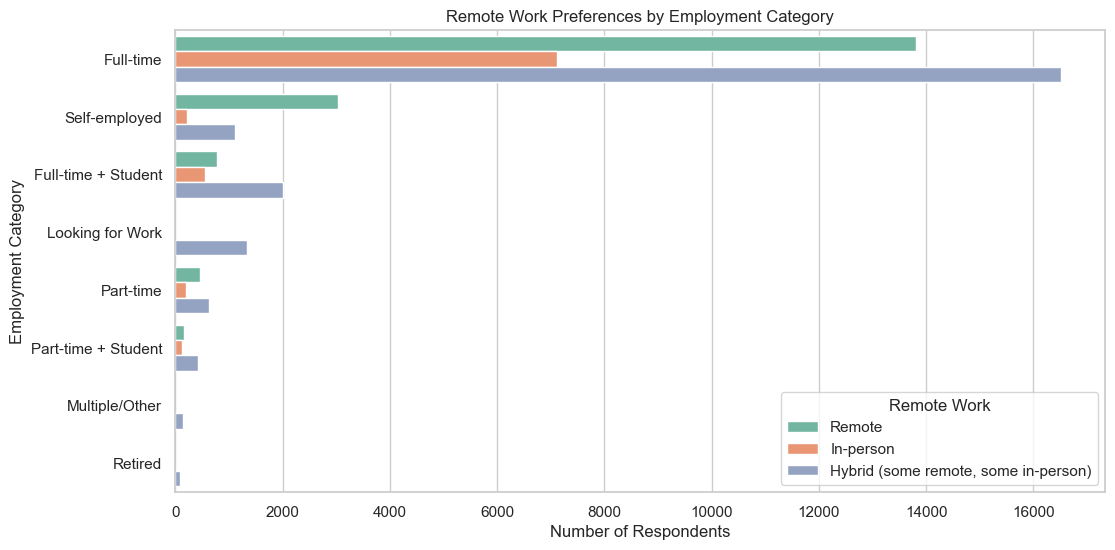

RemoteWork           Hybrid (some remote, some in-person)  In-person  Remote
EmploymentCategory                                                          
Full-time                                           44.10      19.00   36.90
Full-time + Student                                 60.05      16.44   23.52
Looking for Work                                   100.00       0.00    0.00
Multiple/Other                                     100.00       0.00    0.00
Part-time                                           49.65      15.12   35.23
Part-time + Student                                 59.29      18.87   21.84
Retired                                            100.00       0.00    0.00
Self-employed                                       25.51       5.07   69.42


In [8]:
# Check unique values for RemoteWork and Employment
print(df['RemoteWork'].value_counts())
#print(df['Employment'].value_counts())

# Function to map Employment to 8 categories
def categorize_employment_fixed(emp):
    emp_lower = emp.lower()
    
    # Base categories
    if 'student' in emp_lower:
        if 'full-time' in emp_lower:
            base = 'Full-time + Student'
        elif 'part-time' in emp_lower:
            base = 'Part-time + Student'
        else:
            base = 'Student + Other'
    else:
        if 'full-time' in emp_lower:
            base = 'Full-time'
        elif 'part-time' in emp_lower:
            base = 'Part-time'
        elif 'self-employed' in emp_lower:
            base = 'Self-employed'
        elif 'looking for work' in emp_lower:
            base = 'Looking for Work'
        elif 'retired' in emp_lower:
            base = 'Retired'
        elif 'not employed' in emp_lower:
            base = 'Not Employed'
        else:
            base = 'Multiple/Other'
    
    return base

# Apply the fixed mapping
df['EmploymentCategory'] = df['Employment'].apply(categorize_employment_fixed)

# Check the new category distribution
print(df['EmploymentCategory'].value_counts())

plt.figure(figsize=(12,6))
sns.countplot(data=df, y='EmploymentCategory', hue='RemoteWork', palette='Set2',
              order=df['EmploymentCategory'].value_counts().index)
plt.title('Remote Work Preferences by Employment Category')
plt.xlabel('Number of Respondents')
plt.ylabel('Employment Category')
plt.legend(title='Remote Work')
plt.show()

remote_by_emp = pd.crosstab(df['EmploymentCategory'], df['RemoteWork'], normalize='index') * 100
print(remote_by_emp.round(2))


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


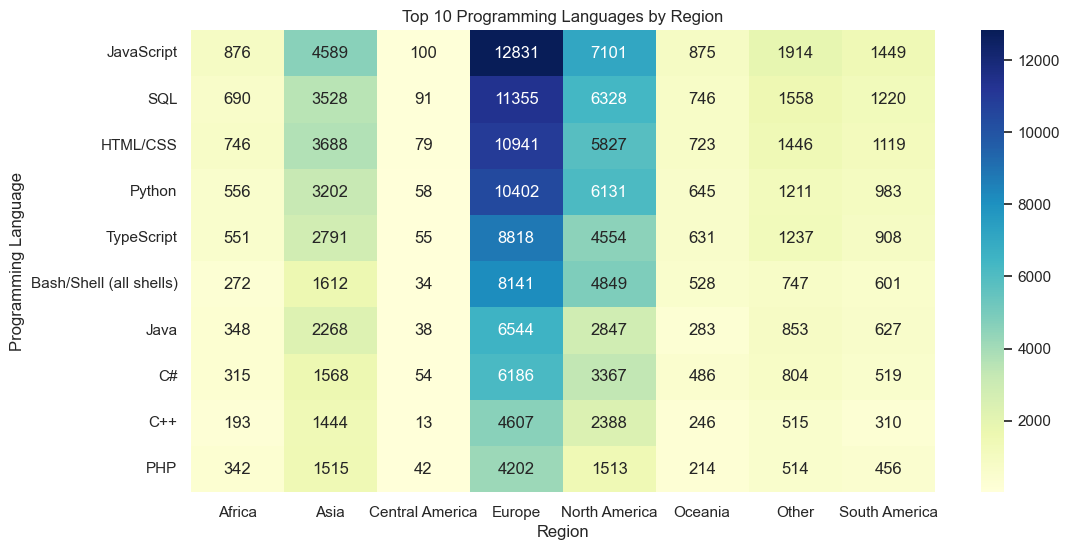

In [9]:
# ------------------------------
# Step 0: Assign countries to regions
# ------------------------------

country_to_region = {
    # North America
    'United States of America': 'North America', 'Canada': 'North America', 'Mexico': 'North America',
    'Bahamas': 'North America', 'Jamaica': 'North America', 'Cuba': 'North America',
    'Dominican Republic': 'North America', 'Saint Kitts and Nevis': 'North America',
    'Antigua and Barbuda': 'North America', 'Barbados': 'North America', 'Trinidad and Tobago': 'North America',

    # Central America
    'Costa Rica': 'Central America', 'El Salvador': 'Central America', 'Guatemala': 'Central America',
    'Honduras': 'Central America', 'Nicaragua': 'Central America', 'Panama': 'Central America',

    # South America
    'Argentina': 'South America', 'Bolivia': 'South America', 'Brazil': 'South America', 'Chile': 'South America',
    'Colombia': 'South America', 'Ecuador': 'South America', 'Guyana': 'South America', 'Paraguay': 'South America',
    'Peru': 'South America', 'Suriname': 'South America', 'Uruguay': 'South America',
    'Venezuela, Bolivarian Republic of...': 'South America',

    # Europe
    'Albania': 'Europe', 'Andorra': 'Europe', 'Armenia': 'Europe', 'Austria': 'Europe', 'Azerbaijan': 'Europe',
    'Belarus': 'Europe', 'Belgium': 'Europe', 'Bosnia and Herzegovina': 'Europe', 'Bulgaria': 'Europe',
    'Croatia': 'Europe', 'Cyprus': 'Europe', 'Czech Republic': 'Europe', 'Denmark': 'Europe', 'Estonia': 'Europe',
    'Finland': 'Europe', 'France': 'Europe', 'Germany': 'Europe', 'Greece': 'Europe', 'Hungary': 'Europe',
    'Iceland': 'Europe', 'Ireland': 'Europe', 'Italy': 'Europe', 'Kosovo': 'Europe', 'Latvia': 'Europe',
    'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe', 'Malta': 'Europe', 'Monaco': 'Europe',
    'Montenegro': 'Europe', 'Netherlands': 'Europe', 'North Macedonia': 'Europe',
    'Norway': 'Europe', 'Poland': 'Europe', 'Portugal': 'Europe', 'Romania': 'Europe', 'Russian Federation': 'Europe',
    'San Marino': 'Europe', 'Serbia': 'Europe', 'Slovakia': 'Europe', 'Slovenia': 'Europe', 'Spain': 'Europe',
    'Sweden': 'Europe', 'Switzerland': 'Europe',
    'United Kingdom of Great Britain and Northern Ireland': 'Europe',

    # Africa
    'Algeria': 'Africa', 'Angola': 'Africa', 'Benin': 'Africa', 'Botswana': 'Africa', 'Burkina Faso': 'Africa',
    'Burundi': 'Africa', "Côte d'Ivoire": 'Africa', 'Cameroon': 'Africa', 'Cape Verde': 'Africa',
    'Democratic Republic of the Congo': 'Africa', 'Congo, Republic of the...': 'Africa', 'Egypt': 'Africa',
    'Ethiopia': 'Africa', 'Gabon': 'Africa', 'Ghana': 'Africa', 'Kenya': 'Africa', 'Lesotho': 'Africa',
    'Liberia': 'Africa', 'Libyan Arab Jamahiriya': 'Africa', 'Madagascar': 'Africa', 'Malawi': 'Africa',
    'Mali': 'Africa', 'Mauritania': 'Africa', 'Mauritius': 'Africa', 'Morocco': 'Africa', 'Mozambique': 'Africa',
    'Namibia': 'Africa', 'Niger': 'Africa', 'Nigeria': 'Africa', 'Rwanda': 'Africa', 'Senegal': 'Africa',
    'Sierra Leone': 'Africa', 'Somalia': 'Africa', 'South Africa': 'Africa', 'Sudan': 'Africa', 'Togo': 'Africa',
    'Tunisia': 'Africa', 'Uganda': 'Africa', 'United Republic of Tanzania': 'Africa', 'Zambia': 'Africa',
    'Zimbabwe': 'Africa',

    # Asia
    'Afghanistan': 'Asia', 'Bahrain': 'Asia', 'Bangladesh': 'Asia', 'Bhutan': 'Asia', 'Brunei Darussalam': 'Asia',
    'Cambodia': 'Asia', 'China': 'Asia', 'Hong Kong (S.A.R.)': 'Asia', 'India': 'Asia', 'Indonesia': 'Asia',
    'Iran, Islamic Republic of...': 'Asia', 'Iraq': 'Asia', 'Israel': 'Asia', 'Japan': 'Asia', 'Jordan': 'Asia',
    'Kazakhstan': 'Asia', 'Kuwait': 'Asia', 'Kyrgyzstan': 'Asia', "Lao People's Democratic Republic": 'Asia',
    'Lebanon': 'Asia', 'Malaysia': 'Asia', 'Maldives': 'Asia', 'Mongolia': 'Asia', 'Myanmar': 'Asia', 'Nepal': 'Asia',
    'North Korea': 'Asia', 'Oman': 'Asia', 'Pakistan': 'Asia', 'Palestine': 'Asia', 'Philippines': 'Asia',
    'Qatar': 'Asia', 'Republic of Korea': 'Asia', 'Saudi Arabia': 'Asia', 'Singapore': 'Asia', 'Sri Lanka': 'Asia',
    'Syrian Arab Republic': 'Asia', 'Taiwan': 'Asia', 'Tajikistan': 'Asia', 'Thailand': 'Asia', 'Turkmenistan': 'Asia',
    'United Arab Emirates': 'Asia', 'Uzbekistan': 'Asia', 'Viet Nam': 'Asia', 'Yemen': 'Asia',

    # Oceania
    'Australia': 'Oceania', 'Fiji': 'Oceania', 'New Zealand': 'Oceania', 'Nauru': 'Oceania', 'Samoa': 'Oceania'
}

# Assign regions
df['Region'] = df['Country'].map(country_to_region)

# Assign 'Other' to countries not in the 7 main regions
valid_regions = ['North America', 'Central America', 'South America', 'Africa', 'Europe', 'Asia', 'Oceania']
df['Region'] = df['Region'].apply(lambda x: x if x in valid_regions else 'Other')

#Step 1
valid_languages = df[['Region', 'LanguageHaveWorkedWith']].dropna()
valid_languages = valid_languages[valid_languages['LanguageHaveWorkedWith'].apply(lambda x: isinstance(x, str))]

#Step 2: Split and flatten
valid_languages = valid_languages.assign(
    Language=valid_languages['LanguageHaveWorkedWith'].str.split(';')
).explode('Language')

valid_languages['Language'] = valid_languages['Language'].str.strip()

#Step 3: Count Languages Per Region
region_lang_counts = valid_languages.groupby(['Region', 'Language']).size().reset_index(name='Count')

# Pivot for heatmap
region_lang_pivot = region_lang_counts.pivot(index='Language', columns='Region', values='Count').fillna(0)

# Keep top 10 languages globally
top_languages = region_lang_pivot.sum(axis=1).sort_values(ascending=False).head(10).index
region_lang_pivot = region_lang_pivot.loc[top_languages]

# Step 4: Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(region_lang_pivot, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Top 10 Programming Languages by Region')
plt.xlabel('Region')
plt.ylabel('Programming Language')
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


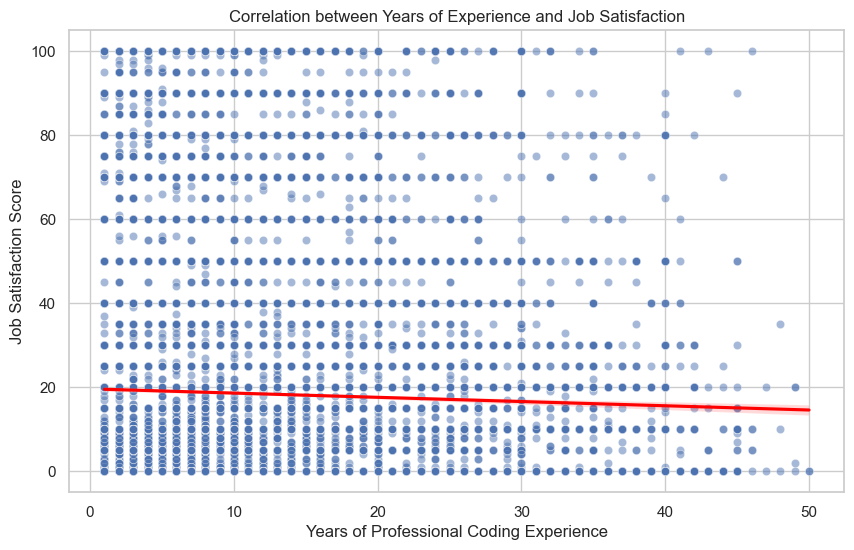

In [10]:
# Keep only rows with valid numeric values
df_exp = df[['YearsCodePro', 'JobSatPoints_1']].dropna()

# Convert to numeric (some datasets store YearsCodePro as strings like "Less than 1 year" or "More than 50 years")
df_exp['YearsCodePro'] = pd.to_numeric(df_exp['YearsCodePro'], errors='coerce')
df_exp['JobSatPoints_1'] = pd.to_numeric(df_exp['JobSatPoints_1'], errors='coerce')

# Drop rows with NaN after conversion
df_exp = df_exp.dropna()

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='YearsCodePro', y='JobSatPoints_1', data=df_exp, alpha=0.5)

# Add trend line (regression)
sns.regplot(x='YearsCodePro', y='JobSatPoints_1', data=df_exp, scatter=False, color='red')

plt.title("Correlation between Years of Experience and Job Satisfaction")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction Score")
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


EmploymentCategory                                  Full-time  \
EdLevel                                                         
Associate degree (A.A., A.S., etc.)                     75.26   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)            79.82   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)         80.19   
Primary/elementary school                               54.64   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)          80.65   
Secondary school (e.g. American high school, Ge...      56.50   
Some college/university study without earning a...      67.48   
Something else                                          67.92   

EmploymentCategory                                  Full-time + Student  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                7.48   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                       6.24   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  

/var/folders/9p/y0kbtlsn5pz3whpg7t596tj00000gn/T/ipykernel_51235/2409776625.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


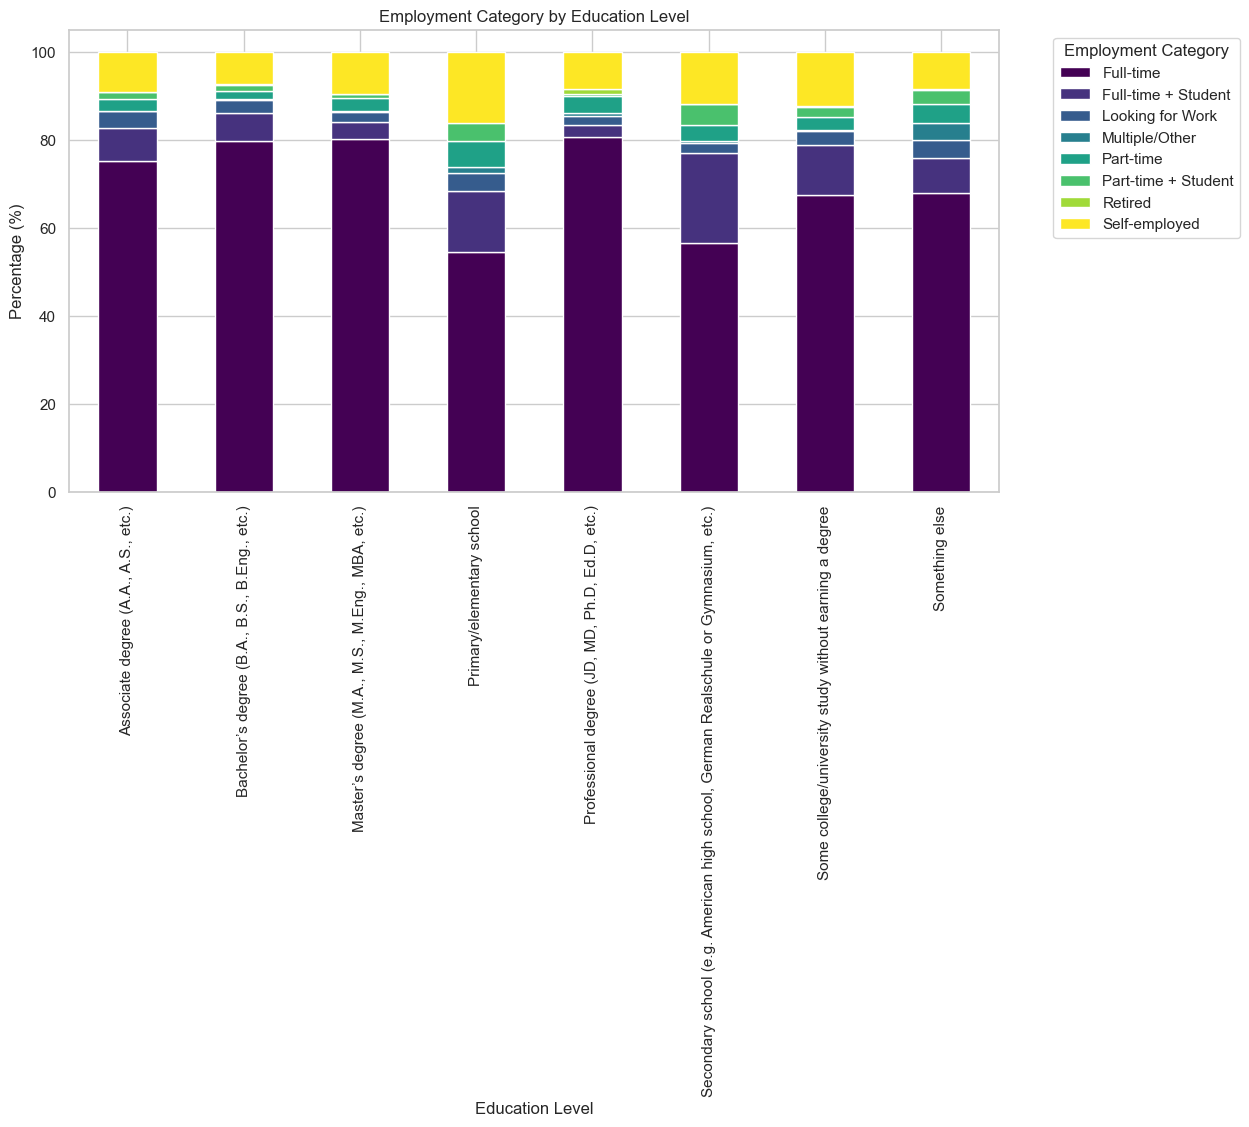

In [11]:
#Cross-tabulation with percentages so we can analyze the impact of EdLevel on Employment: 
crosstab_percent = pd.crosstab(df['EdLevel'], df['EmploymentCategory'], normalize='index') * 100
crosstab_percent = crosstab_percent.round(2)
print(crosstab_percent)

#Each EdLevel will add up to 100% across all EmploymentCategory values.

#Stacked Bar Graph for easier visualization of correlation:
crosstab_percent.plot(kind='bar', stacked=True, figsize=(12,6), colormap="viridis")

plt.title("Employment Category by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Percentage (%)")
plt.legend(title="Employment Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



#### Step 10: Save the Cleaned and Analyzed Dataset


After the analysis, save the modified dataset for further use or sharing.


In [12]:
# Save to CSV 
df.to_csv('cleaned_survey_data.csv', index=False)
df.to_csv('clean_df.csv', index=False)

<h2>Summary</h2>


In this revised lab, I:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
